In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_and_prepare_data(file_path):
    data = pd.read_csv(file_path)

    # Auswahl der Merkmale und der Zielvariablen, Ausschluss von 'Category'
    features = data.drop(columns=['Price', 'Category'])
    target = data['Price']

    # Umwandlung der kategorialen Variablen in numerische Form
    features = pd.get_dummies(features, drop_first=True)

    # Skalierung der Features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled, target, features.columns, data

file_path = 'csvs/Ad_table_with_groups_final.csv'
X, y, feature_names, original_data = load_and_prepare_data(file_path)


In [22]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

def cross_validate_models(X, y):
    models = {
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Linear Regression': LinearRegression()
    }

    cv_results = {}
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        y_pred = cross_val_predict(model, X, y, cv=kf)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        mape = mean_absolute_percentage_error(y, y_pred)
        n = len(y)
        p = X.shape[1]
        rse = (mse / (n - p - 1)) ** 0.5
        cv_results[name] = {
            'Model': model.fit(X, y),  # Modell wird hier explizit trainiert
            'R²': r2,
            'MSE': mse,
            'RSE': rse,
            'MAPE': mape,
            'MAE': mae,
            'Predictions': y_pred
        }

    return cv_results

cv_results = cross_validate_models(X, y)
results_df = pd.DataFrame(cv_results).T
print(results_df)


                                                               Model  \
Gradient Boosting  ([DecisionTreeRegressor(criterion='friedman_ms...   
Random Forest      (DecisionTreeRegressor(max_features=1.0, rando...   
Decision Tree                 DecisionTreeRegressor(random_state=42)   
Linear Regression                                 LinearRegression()   

                                             R²  \
Gradient Boosting                      0.896471   
Random Forest                          0.922703   
Decision Tree                          0.889561   
Linear Regression -66319034679556528152772608.0   

                                                     MSE  \
Gradient Boosting                        45333812.188085   
Random Forest                            33846899.368389   
Decision Tree                            48359169.802389   
Linear Regression  29039984080203810886255270269288448.0   

                                    RSE                 MAPE  \
Gradient Boosting 

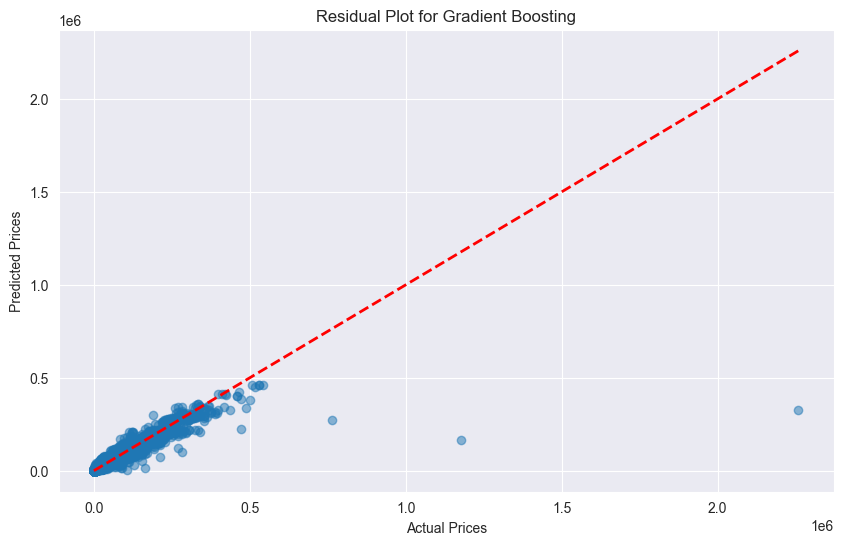

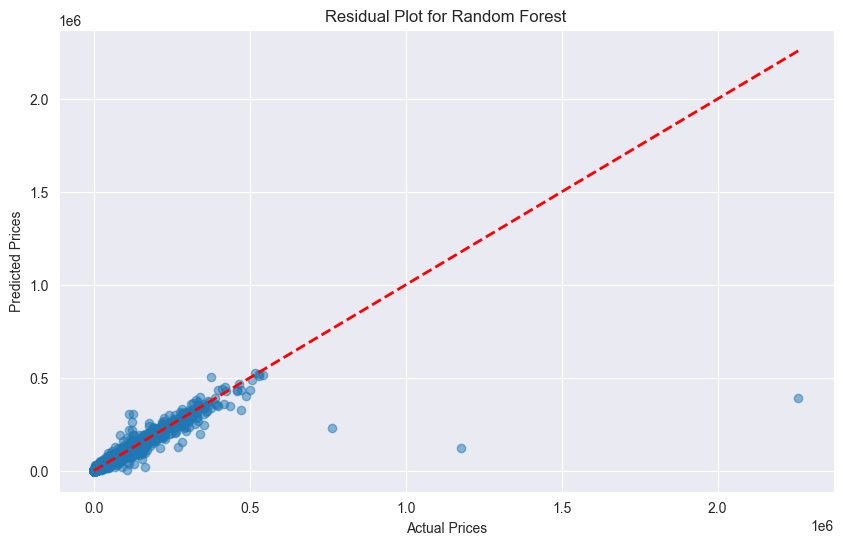

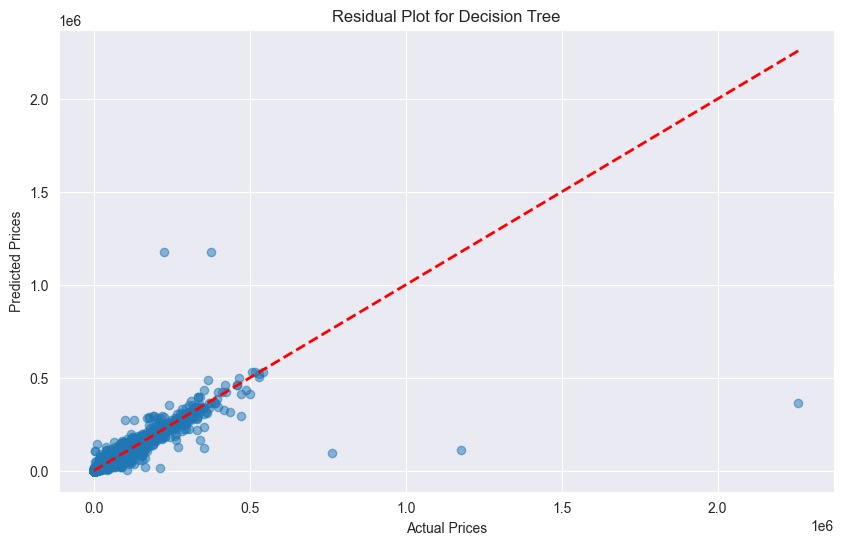

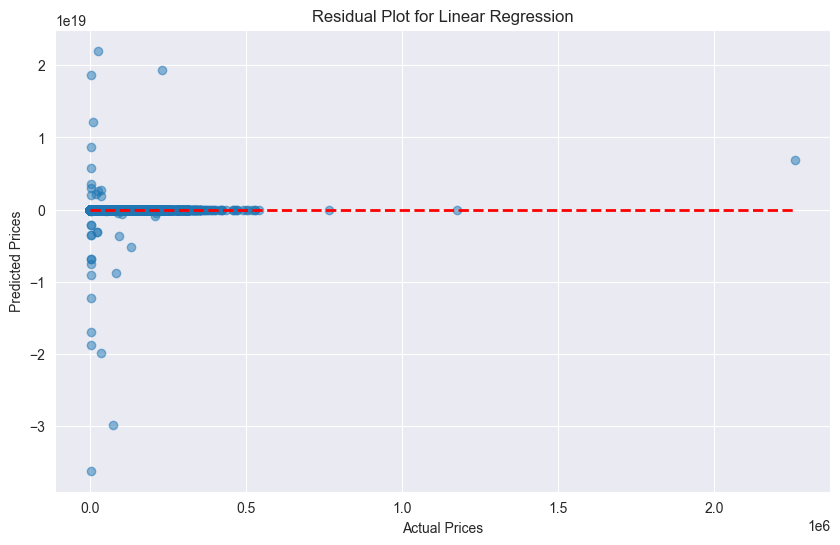

In [26]:
import matplotlib.pyplot as plt

def plot_residuals(cv_results):
    for name, results in cv_results.items():
        y_true = y
        y_pred = results['Predictions']
        plt.figure(figsize=(10, 6))
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--r', linewidth=2)
        plt.title(f'Residual Plot for {name}')
        plt.xlabel('Actual Prices')
        plt.ylabel('Predicted Prices')
        plt.grid(True)
        plt.savefig(f'residual_plot_{name.lower().replace(" ", "_")}.png')
        plt.show()

plot_residuals(cv_results)


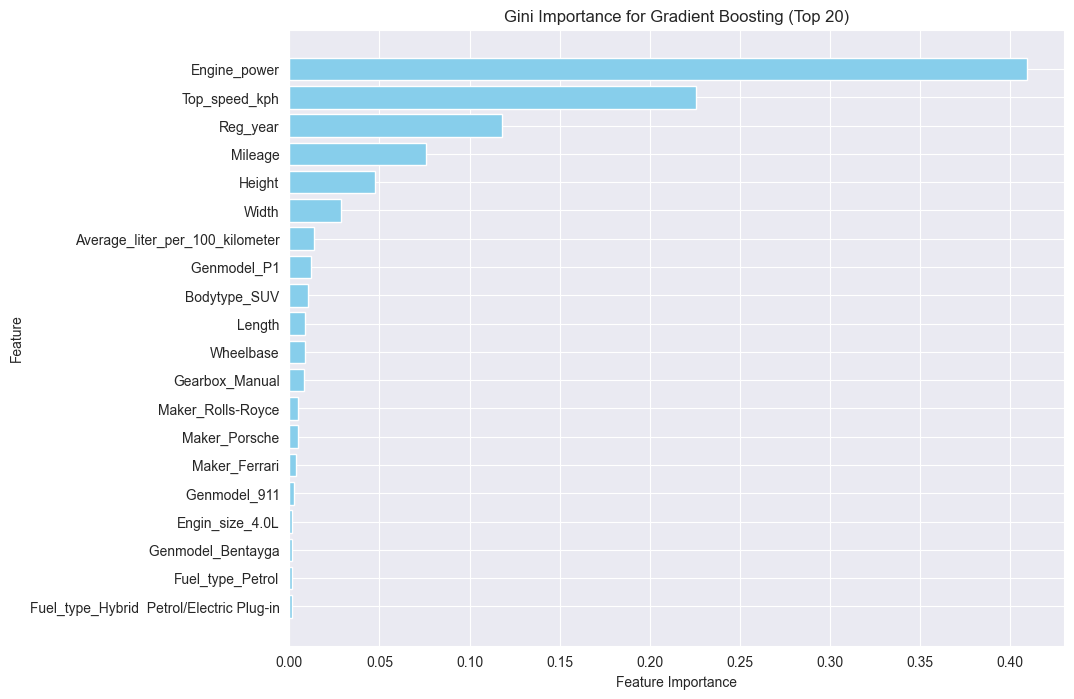

,Feature,Importance
2,Engine_power,0.409456
9,Top_speed_kph,0.225894
0,Reg_year,0.118125
1,Mileage,0.076027
5,Height,0.047511
6,Width,0.028665
8,Average_liter_per_100_kilometer,0.013788
473,Genmodel_P1,0.011833
740,Bodytype_SUV,0.010335
7,Length,0.008768


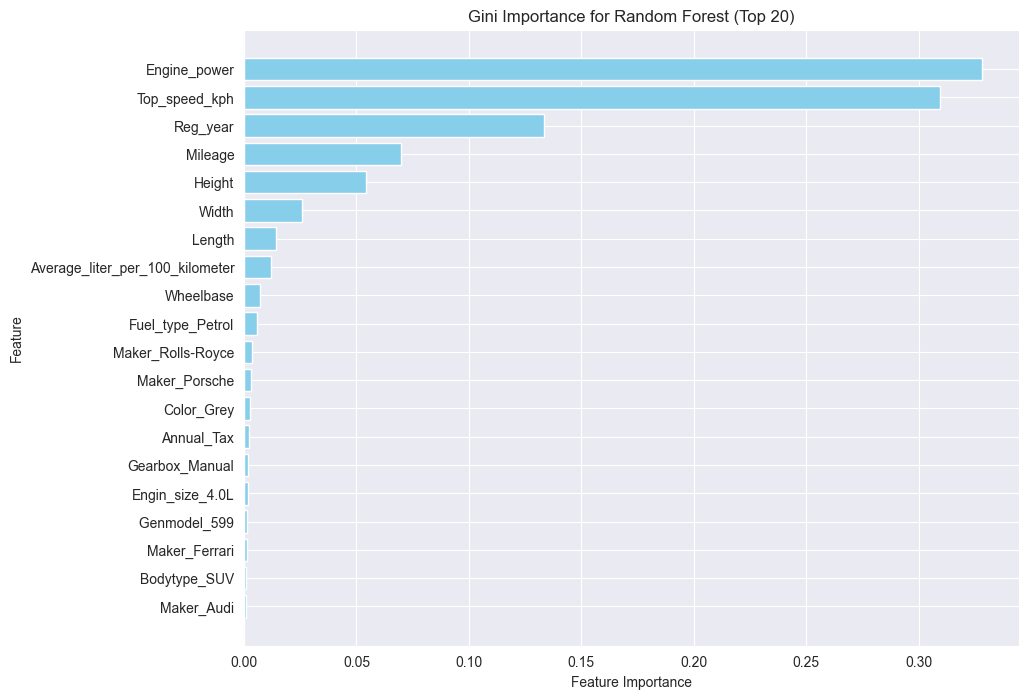

,Feature,Importance
2,Engine_power,0.328269
9,Top_speed_kph,0.309317
0,Reg_year,0.133246
1,Mileage,0.069603
5,Height,0.054201
6,Width,0.025830
7,Length,0.014027
8,Average_liter_per_100_kilometer,0.011894
4,Wheelbase,0.006964
808,Fuel_type_Petrol,0.005897


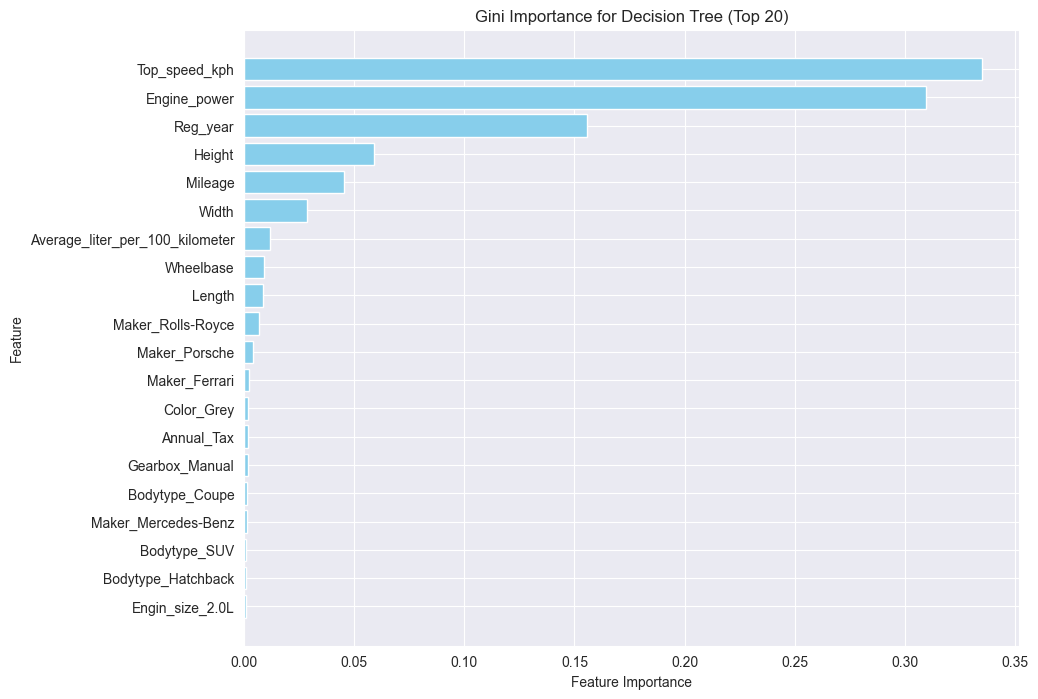

,Feature,Importance
9,Top_speed_kph,0.335086
2,Engine_power,0.309799
0,Reg_year,0.155716
5,Height,0.059113
1,Mileage,0.045240
6,Width,0.028574
8,Average_liter_per_100_kilometer,0.011659
4,Wheelbase,0.008840
7,Length,0.008577
56,Maker_Rolls-Royce,0.006607


In [27]:
def plot_gini_importance(model, feature_names, model_name, top_n=20):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False).head(top_n)

        # Plot
        plt.figure(figsize=(10, 8))
        plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(f'Gini Importance for {model_name} (Top {top_n})')
        plt.gca().invert_yaxis()
        plt.show()

        # Tabelle anzeigen
        display(importance_df)

for name, results in cv_results.items():
    if 'feature_importances_' in dir(results['Model']):
        plot_gini_importance(results['Model'], feature_names, name)


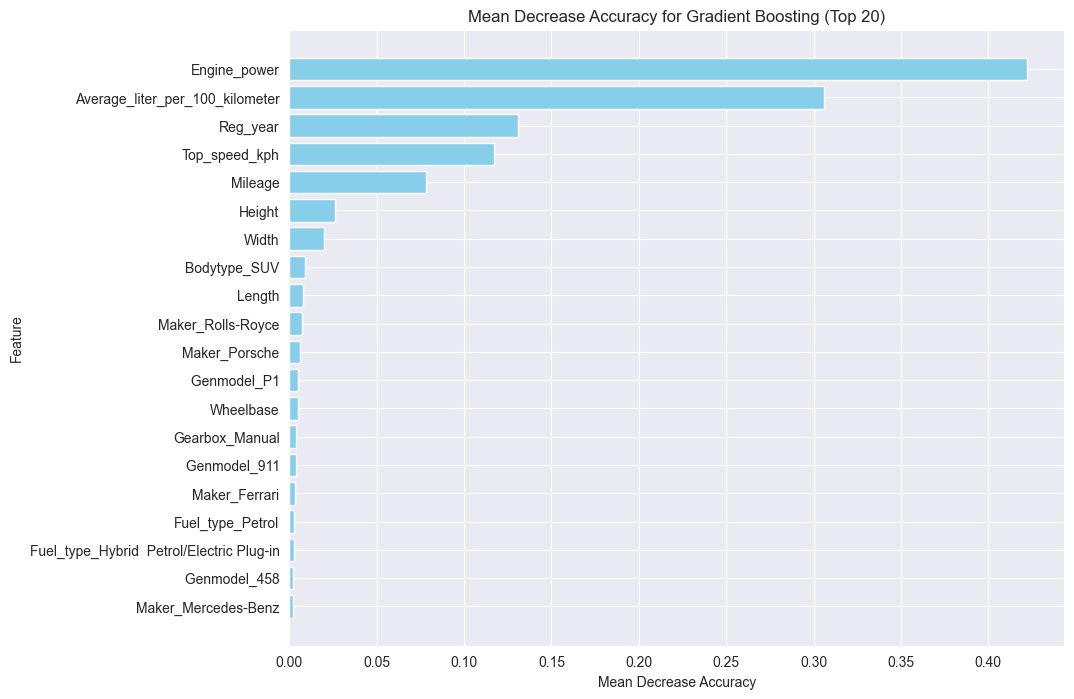

,Feature,Importance
2,Engine_power,0.422385
8,Average_liter_per_100_kilometer,0.306277
0,Reg_year,0.130928
9,Top_speed_kph,0.116902
1,Mileage,0.078044
5,Height,0.026006
6,Width,0.019808
740,Bodytype_SUV,0.009214
7,Length,0.007605
56,Maker_Rolls-Royce,0.007392


In [ ]:
from sklearn.inspection import permutation_importance

def plot_mda(model, X, y, feature_names, model_name, top_n=20):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
    importance_df = importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Mean Decrease Accuracy')
    plt.ylabel('Feature')
    plt.title(f'Mean Decrease Accuracy for {model_name} (Top {top_n})')
    plt.gca().invert_yaxis()
    plt.show()

    # Tabelle anzeigen
    display(importance_df)

for name, results in cv_results.items():
    plot_mda(results['Model'], X, y, feature_names, name)

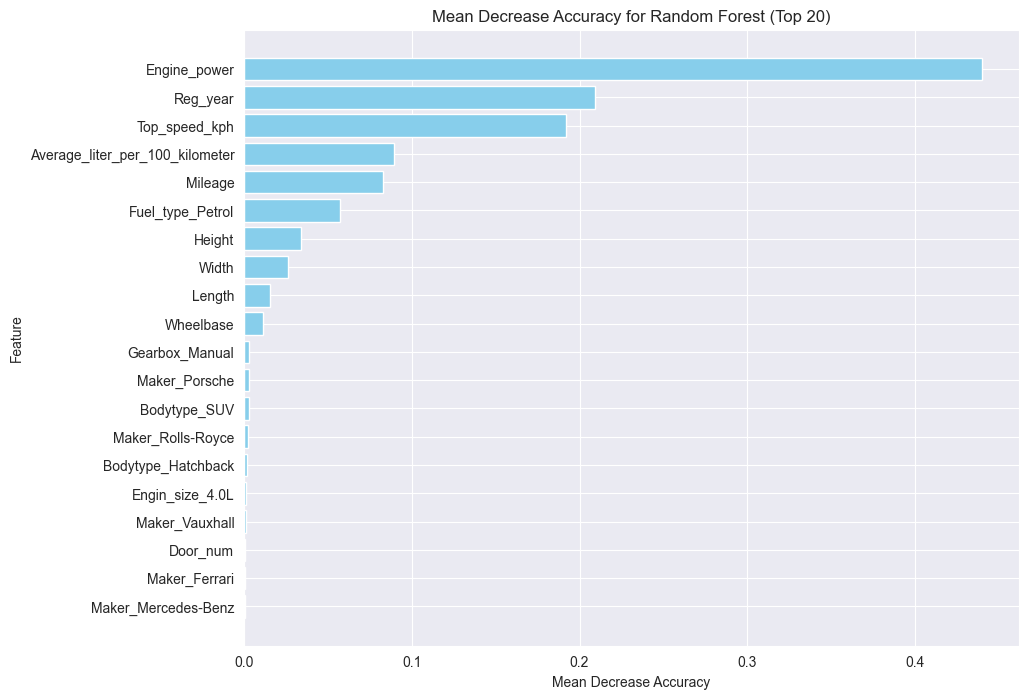

,Feature,Importance
2,Engine_power,0.440005
0,Reg_year,0.209333
9,Top_speed_kph,0.192220
8,Average_liter_per_100_kilometer,0.089460
1,Mileage,0.082858
808,Fuel_type_Petrol,0.057171
5,Height,0.033689
6,Width,0.026423
7,Length,0.015242
4,Wheelbase,0.011576


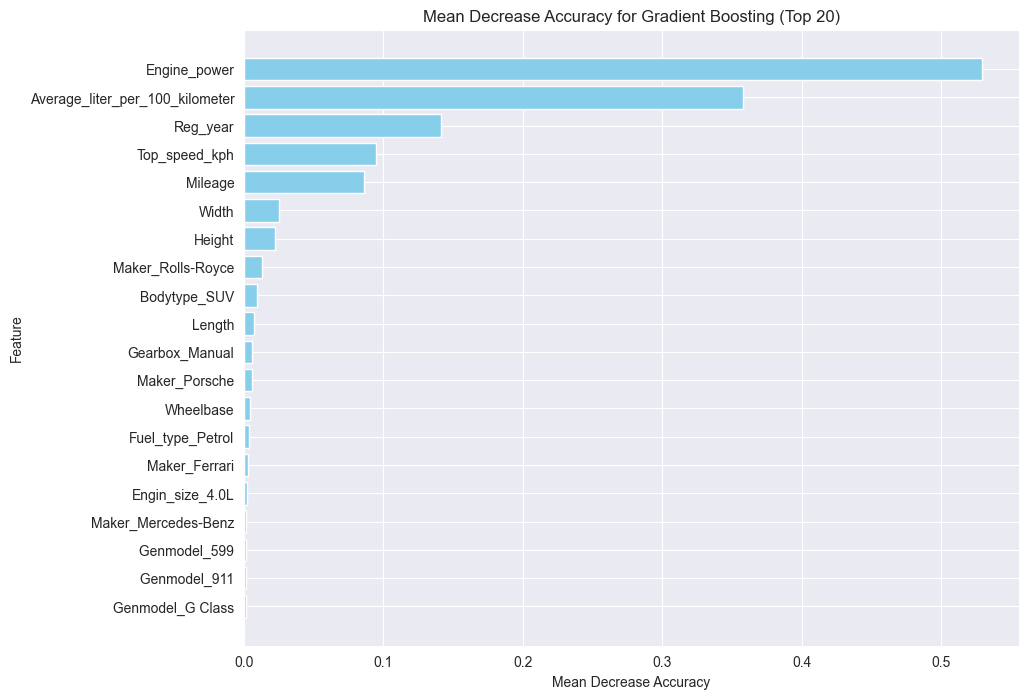

,Feature,Importance
2,Engine_power,0.529601
8,Average_liter_per_100_kilometer,0.357692
0,Reg_year,0.141368
9,Top_speed_kph,0.095052
1,Mileage,0.086401
6,Width,0.024990
5,Height,0.022042
56,Maker_Rolls-Royce,0.012694
740,Bodytype_SUV,0.009160
7,Length,0.007107


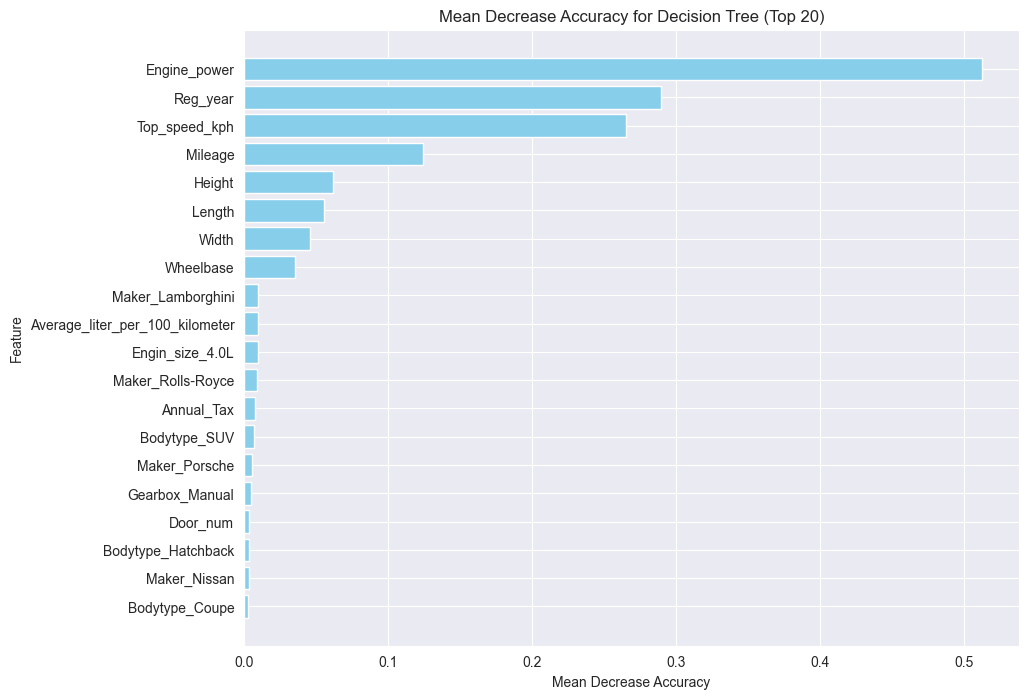

,Feature,Importance
2,Engine_power,0.512715
0,Reg_year,0.289941
9,Top_speed_kph,0.265136
1,Mileage,0.124197
5,Height,0.061668
7,Length,0.055884
6,Width,0.045873
4,Wheelbase,0.035215
36,Maker_Lamborghini,0.009866
8,Average_liter_per_100_kilometer,0.009566


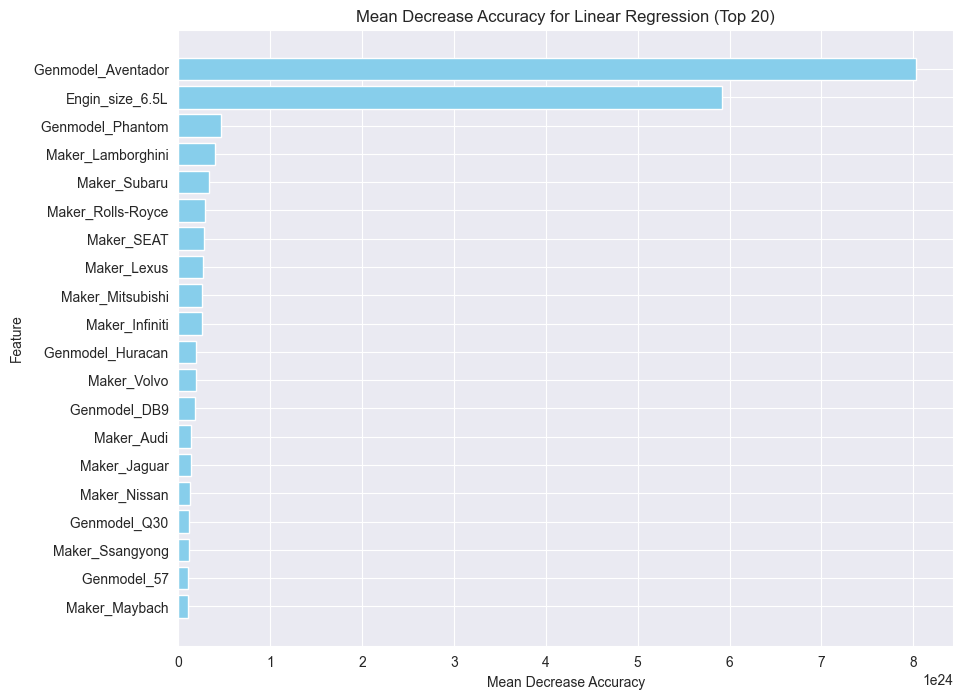

,Feature,Importance
197,Genmodel_Aventador,8.032637e+24
798,Engin_size_6.5L,5.919194e+24
486,Genmodel_Phantom,4.598996e+23
36,Maker_Lamborghini,4.043722e+23
63,Maker_Subaru,3.345851e+23
56,Maker_Rolls-Royce,2.870555e+23
58,Maker_SEAT,2.773924e+23
38,Maker_Lexus,2.645970e+23
48,Maker_Mitsubishi,2.582854e+23
31,Maker_Infiniti,2.532163e+23


In [11]:
def add_predictions_to_data(cv_results, original_data):
    for name, results in cv_results.items():
        original_data[f'{name}_Prediction'] = results['Predictions']

    return original_data

updated_data = add_predictions_to_data(cv_results, original_data)
updated_data.to_csv('Ad_table_with_predictions.csv', index=False)


In [ ]:
def add_predictions_to_data(cv_results, original_data):
    for name, results in cv_results.items():
        original_data[f'{name}_Prediction'] = results['Predictions']

    return original_data

updated_data = add_predictions_to_data(cv_results, original_data)
updated_data.to_csv('Ad_table_with_predictions.csv', index=False)
